# Лабораторная работа №2 часть 1

Студент: Киряков Виталий

Датасет: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)


Описание полей:

1.   **Diabetes_binary** - целевой признак: 0 = диабета нет, 1 = преддиабет
или диабет
2.   **HighBP** - артериальное давление: 0 = нет высокого АД, 1 = высокое АД
3.   **HighChol** - уровень холестерина: 0 = нет высокого уровня холестерина, 1 = высокий уровень холестерина
4.   **CholCheck** - наличие проверок уровня холестирина за последние 5 лет: 0 = нет проверок уровня холестерина в течение 5 лет, 1 = есть проверки уровня холестерина в течение 5 лет
5.   **BMI** - ндекс массы тела
6.   **Smoker** - выкурили ли вы хотя бы 100 сигарет за всю свою жизнь? [Примечание: 5 пачек = 100 сигарет]: 0 = нет, 1 = да
7.   **Stroke** - когда-нибудь у вас был инсульт? 0 = нет, 1 = да
8.   **HeartDiseaseorAttack** - наличие ишемической болезни сердца (ИБС) или инфаркта миокарды (ИМ): 0 = нет, 1 = да
9.   **PhysActivity** - физическая активность за последние 30 дней, без учета работы: 0 = нет, 1 = да
10.   **Fruits** - употребляйте фрукты 1 или более раз в день?: 0 = нет, 1 = да
11.   **Veggies** - употребляйте овощи 1 или более раз в день?: 0 = нет, 1 = да
12.   **HvyAlcoholConsump**	- сильно пьющие (взрослые мужчины, выпивающие более 14 напитков в неделю, и взрослые женщины, выпивающие более 7 напитков в неделю): 0 = нет, 1 = да
13.   **AnyHealthcare** - наличие мед. страховки: 0 = нету, 1 = есть
14.   **NoDocbcCost** - был ли момент за последние 12 месяцев, когда вам нужно было обратиться к врачу, но вы не смогли из-за дороговизны?: 0 = нет, 1 = да
15.   **GenHlth** - оценка самочувствие по шкале 1-5: 1 = отлично, 2 = очень хорошо, 3 = хорошо, 4 = справедливо, 5 = плохо
16.   **MentHlth** - сколько дней в течение последних 30 дней ваше психическое здоровье было плохим? (стресс, депрессию и проблемы с эмоциями): масштаб 1-30 дней
17.   **PhysHlth** - сколько дней в течение последних 30 дней ваше физическое здоровье было плохим? (физические заболевания и травмы): масштаб 1-30 дней
18.   **DiffWalk** - испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице?: 0 = нет, 1 = да
19.   **Sex** - 0 = женщина, 1 = мужчина
20.   **Age** - 13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or older
21.   **Education** - Уровень образования (EDUCA см. кодовую книгу), шкала 1-6: 1 = Никогда не посещал школу или только детский сад, 2 = С 1 по 8 классы (начальная школа), 3 = С 9 по 11 классы (некоторые старшие школы), 4 = 12 класс или GED (выпускник средней школы), 5 = Колледж от 1 года до 3 лет (некоторые колледжи или технические школы), 6 = Колледж от 4 лет и более (выпускник колледжа)
22.   **Income** - Шкала доходов (INCOME2 см. кодовую книгу), шкала 1-8: 1 = менее 10 000 долларов, 5 = менее 35 000 долларов, 8 = 75 000 долларов или более

In [4]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных


In [5]:
# используем Pandas read_csv():
dataset = pd.read_csv('/content/drive/MyDrive/Университет/Технологии машинного обучения и нейросети для решения прикладных задач/Лаб №2/data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Анализ данных

In [6]:
# размер датасета, 150 записей, 5 столбцов

dataset.shape

(70692, 22)

In [7]:
# отображаем первые 10 сстрок датасета
pd.set_option('display.max_columns', None)
dataset.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [8]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
dataset['Diabetes_binary'].unique()

array([0., 1.])

In [11]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,35346
1.0,35346


Видим, что набор данных сбалансированный. В каждом классе 50 записей. Всего классов 3

# Визуализация данных

In [12]:
# Точками показаны предпологаемые выбросы
# Удалим выбросы

# Рассчитываем IQR (межквартильный размах) для столбца
Q1 = dataset['BMI'].quantile(0.25)
Q3 = dataset['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Удаляем строки с выбросами в столбце
dataset = dataset[~((dataset['BMI'] < (Q1 - 1.5 * IQR)) | (dataset['BMI'] > (Q3 + 1.5 * IQR)))]

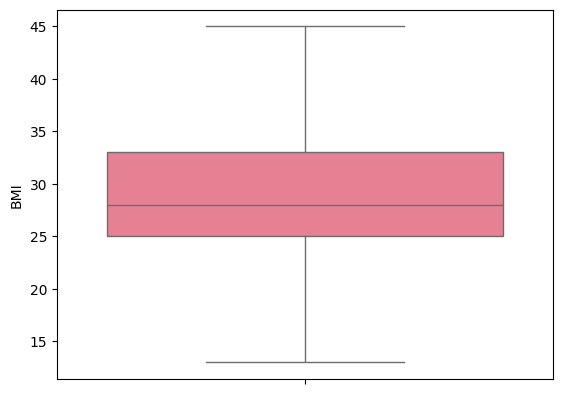

In [13]:
# Смотрим результат
sns.boxplot(data=dataset['BMI']);

In [14]:
# Нормализация
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['mmBMI']] = scaler_mm.fit_transform(dataset[['BMI']])
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,mmBMI
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,0.40625
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,0.40625
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,0.40625
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,0.46875
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,0.50000


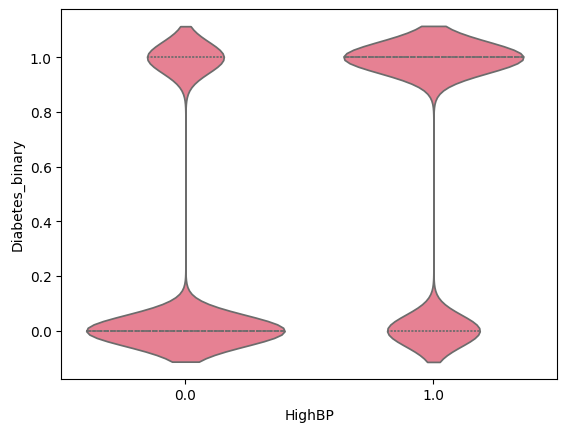

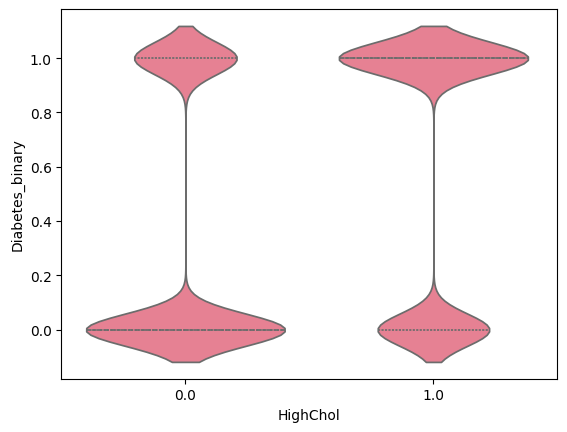

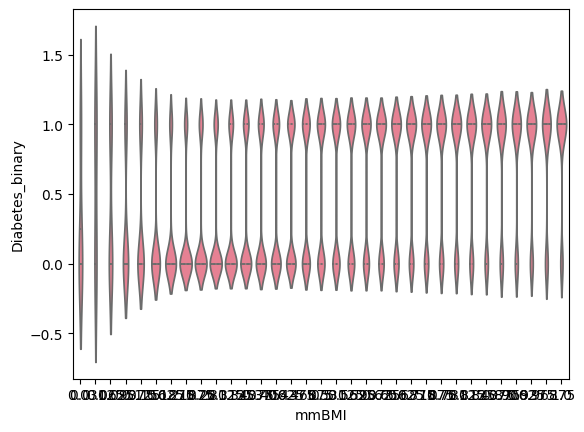

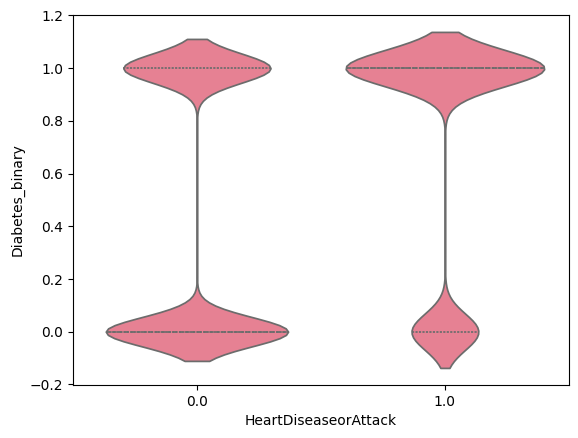

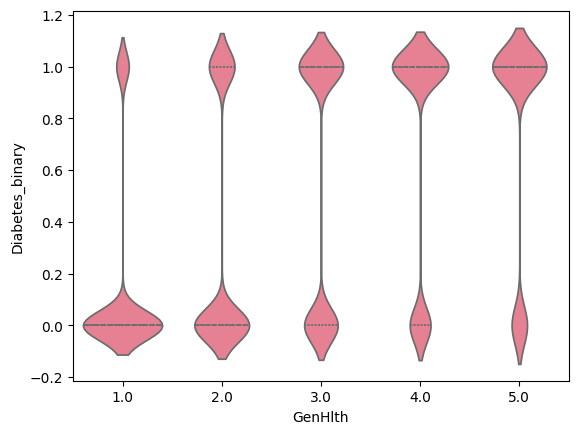

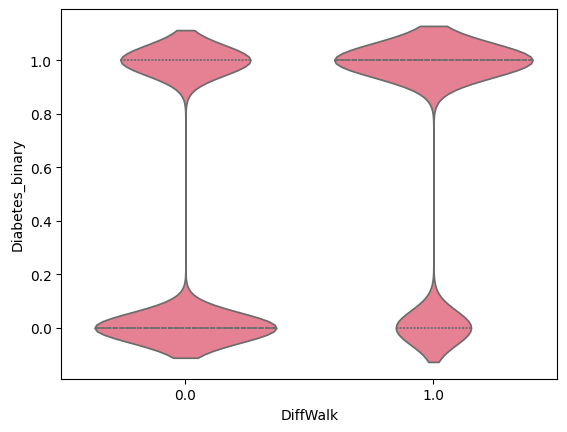

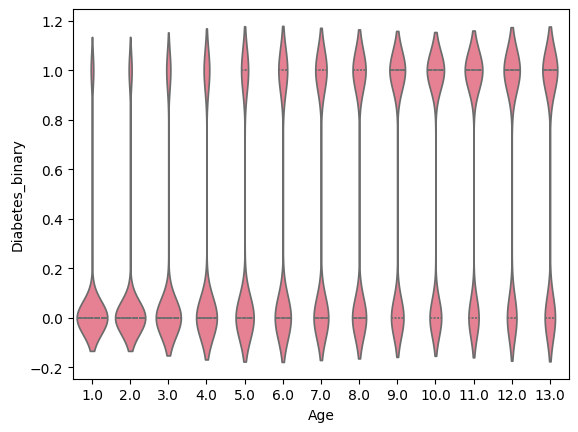

In [15]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Diabetes_binary', x='HighBP', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Diabetes_binary', x='HighChol', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Diabetes_binary', x='mmBMI', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Diabetes_binary', x='HeartDiseaseorAttack', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Diabetes_binary', x='GenHlth', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Diabetes_binary', x='DiffWalk', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Diabetes_binary', x='Age', data=dataset, inner='quartile')
plt.show()

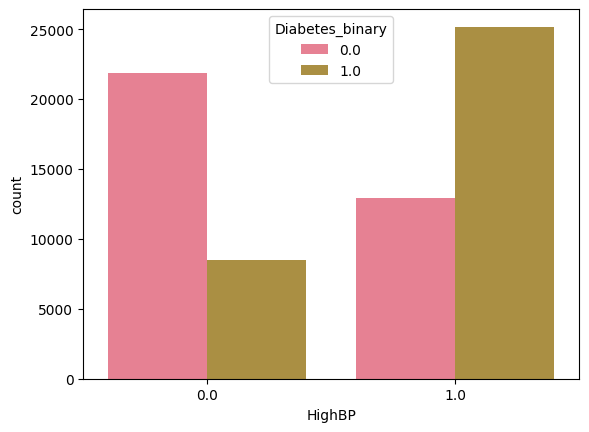

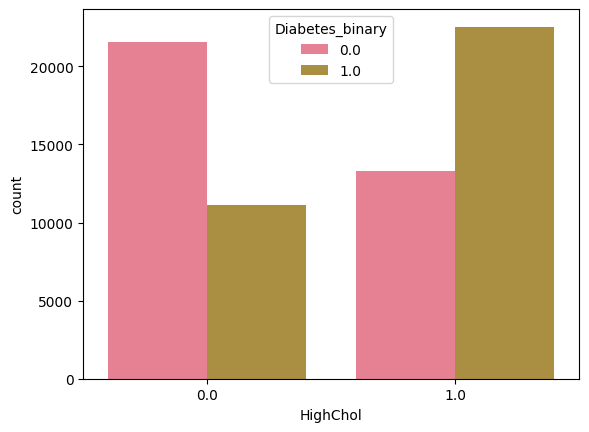

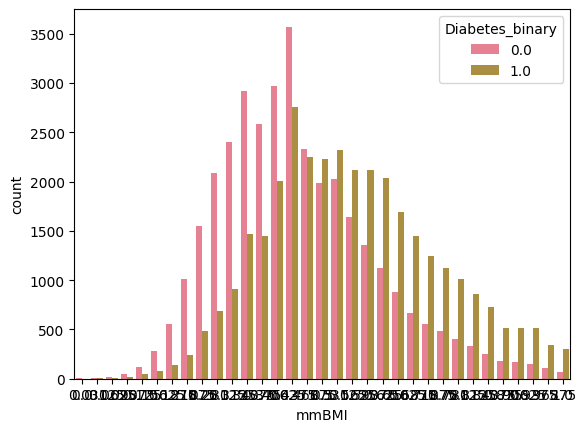

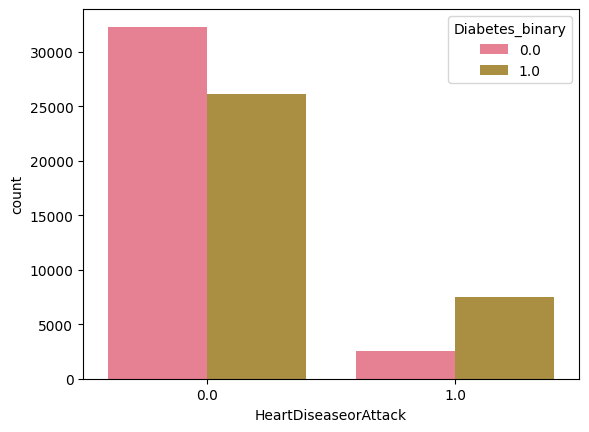

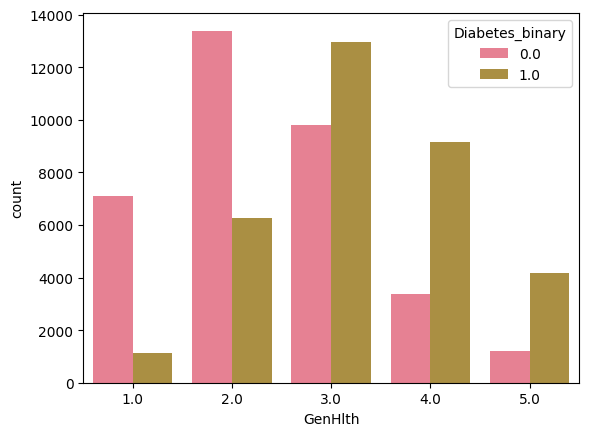

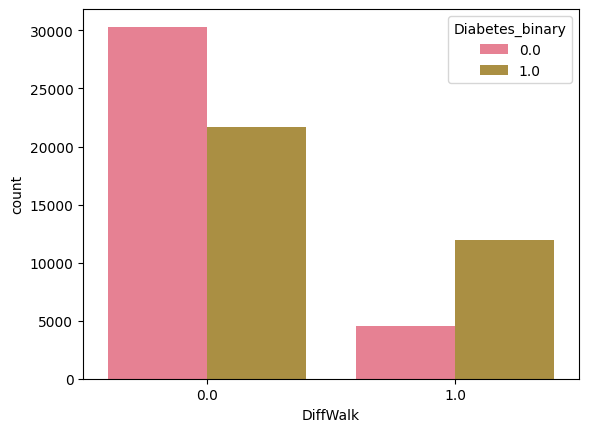

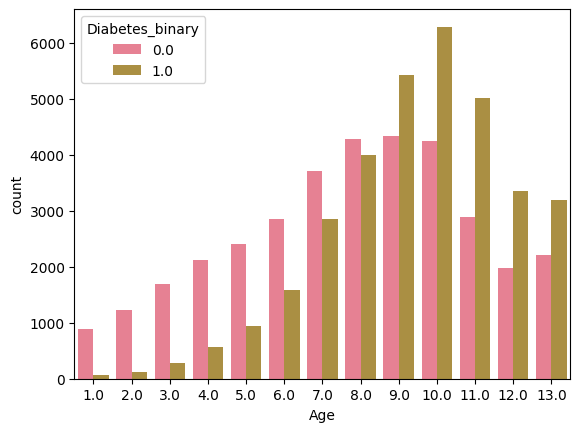

In [16]:
sns.countplot(data=dataset, x="HighBP", hue='Diabetes_binary');
plt.show()
sns.countplot(data=dataset, x="HighChol", hue='Diabetes_binary');
plt.show()
sns.countplot(data=dataset, x="mmBMI", hue='Diabetes_binary');
plt.show()
sns.countplot(data=dataset, x="HeartDiseaseorAttack", hue='Diabetes_binary');
plt.show()
sns.countplot(data=dataset, x="GenHlth", hue='Diabetes_binary');
plt.show()
sns.countplot(data=dataset, x="DiffWalk", hue='Diabetes_binary');
plt.show()
sns.countplot(data=dataset, x="Age", hue='Diabetes_binary');
plt.show()

In [17]:
# Самые интересные признаки
df = dataset[['Diabetes_binary', 'HighBP', 'HighChol', 'mmBMI', 'GenHlth', 'DiffWalk', 'Age']]

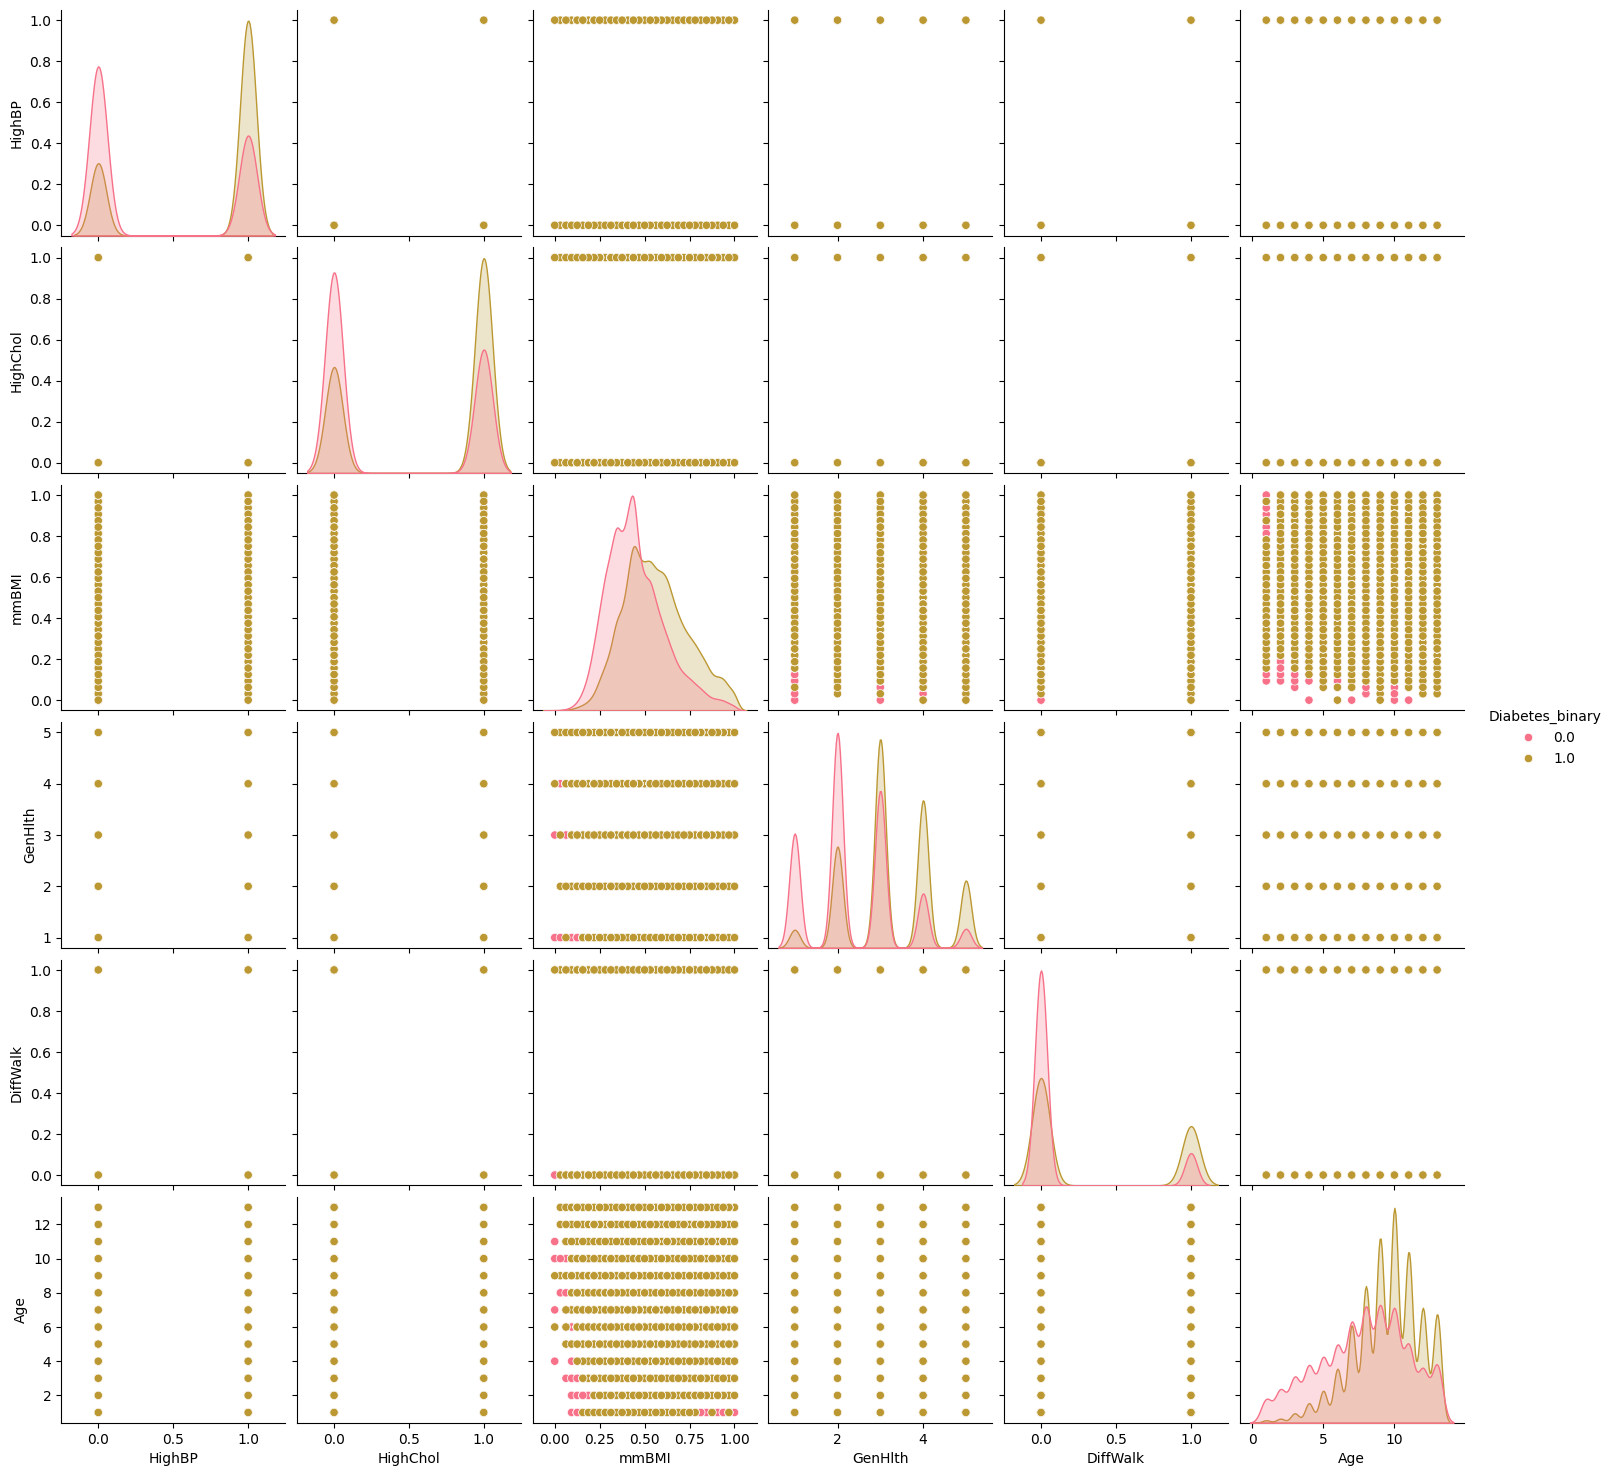

In [18]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(df, kind="scatter", hue="Diabetes_binary");

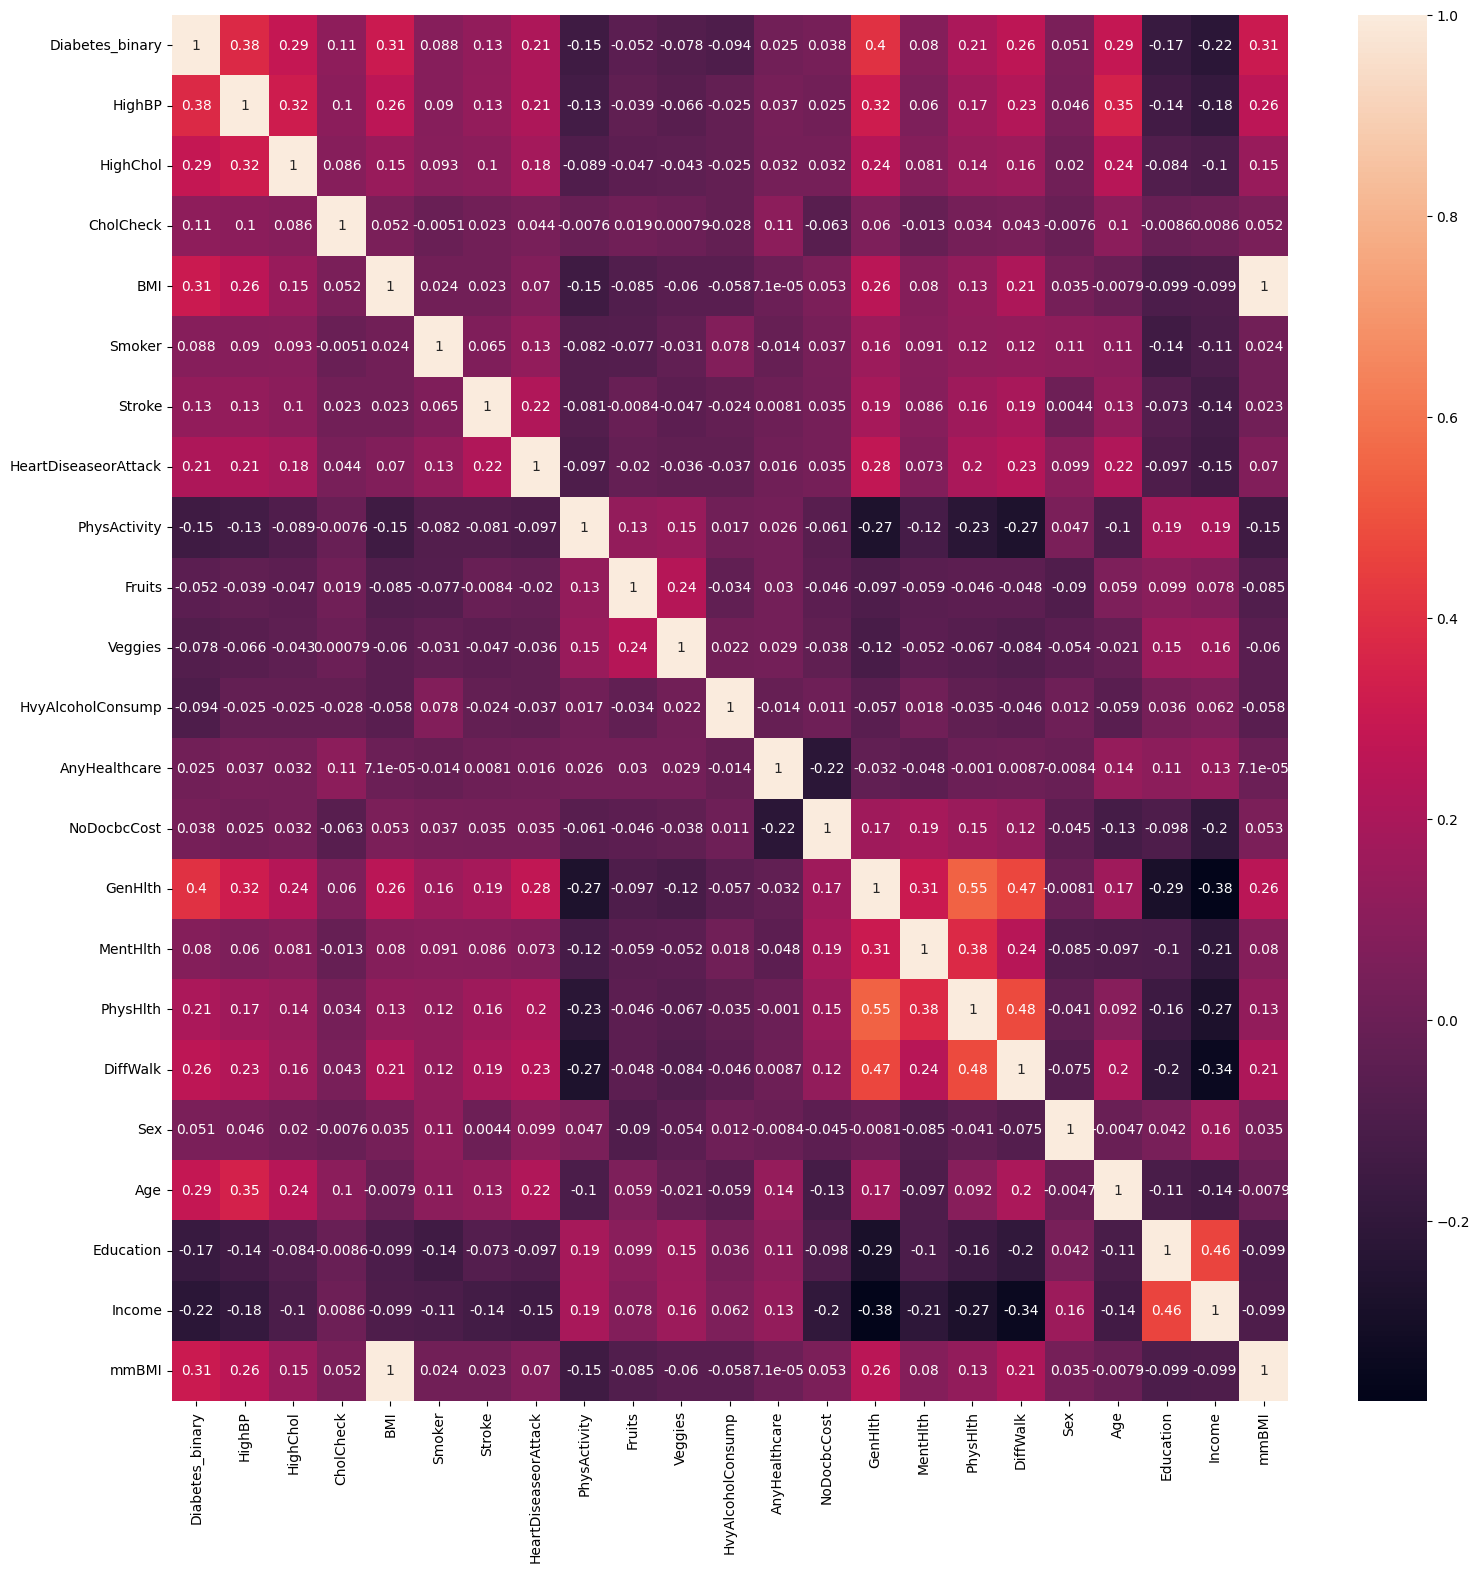

In [19]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

Очень подробное и понятное описание возможностей построения графиков с помощью Matplotlib и Pandas с примерами кода можно найти здесь:

https://colab.research.google.com/drive/1ggUqm3C-Jk3dcMeibMW88FZLu7vtJ2k8?usp=sharing


# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.


In [20]:
X = dataset.drop(['Diabetes_binary', 'BMI', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost'], axis=1)
y = dataset['Diabetes_binary']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (68511, 15) | y shape: (68511,) 


X имеет 68511 строку и 6 столбцов, тогда как Y имеет 68511 строку и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [22]:
# import scipy.stats as stats

# y_mapped = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# # почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
# X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

# stats.ttest_ind (a=y_train, b=y_test)

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

# stats.ttest_ind (a=y_train, b=y_test)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [24]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.745986 (0.005343)
LDA: 0.745822 (0.005083)
KNN: 0.697435 (0.003781)
CART: 0.656765 (0.006945)
NB: 0.717851 (0.003536)


LinearDiscriminantAnalysis и Логистическая регрессия показали лучшие метрики среди всех алгоритмов.
Далее работаем с LinearDiscriminantAnalysis.

Давайте обучим модель LDA на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель LDA
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [25]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.7464788732394366
sk LDA prediction: [1. 1. 0. ... 1. 1. 0.]
sk transformed features
[[3.9132959  5.41627223 2.81477021 3.53223858 4.35180519]]


## Визуализация решения

<Axes: title={'center': 'LDA surface with original features'}>

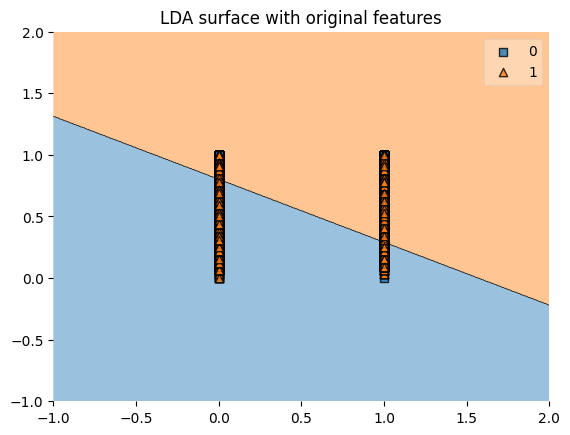

In [26]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train.astype(np.int_)
X_2d= X_train[['HighBP',	'mmBMI']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

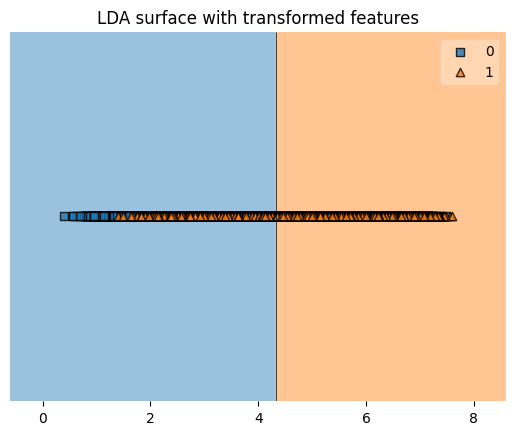

In [27]:
# df = dataset["class"].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

Xs = df[['HighBP',	'mmBMI']]
ys = df['Diabetes_binary'].to_numpy().astype(np.int_)

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

In [28]:
predicted = sk_lda2.predict(X1_lda_test)


In [29]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.75
Precision (confidence when predicting a 1): 0.75
Detail:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      8607
         1.0       0.74      0.77      0.75      8521

    accuracy                           0.75     17128
   macro avg       0.75      0.75      0.75     17128
weighted avg       0.75      0.75      0.75     17128

